### Noise Injection with the Laplace Mechanism

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, zipfile, io

This notebook explores one disclosure avoidance technique that injects Laplacian-distributed noise to tabulated PUMS data. First, let's download the PUMS data and read it into a pandas dataframe.

In [2]:
r = requests.get('https://www2.census.gov/programs-surveys/acs/data/pums/2017/5-Year/csv_ppa.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extract('psam_p42.csv')
pa = pd.read_csv("psam_p42.csv")

Filtering on geographic location, race, educational attainment and wage/salary income in past 12 months
For column codes see:
https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2017.pdf?

In [75]:
new_pa = pa.query("AGEP>=18 and SCH==1").filter(items=['PUMA','RAC1P','SCHL','WAGP','PINCP','AGEP','OCPIP',])

pivotTableDF = pd.pivot_table(new_pa,
                              index='RAC1P',
                              columns='SCHL',
                              values='PINCP',
                              aggfunc=np.size)

pivotTableDF.columns = ['No schooling','preschool','K','Grade 1','Grade 2','Grade 3','Grade 4','Grade 5','Grade 6','Grade 7','Grade 8'
                        ,'Grade 9','Grade 10','Grade 11','Grade 12-no diploma','HS diploma','GED','some college','1+ year college','Associate',
                        'Bachelor','Master','Professional','Doctorate']
pivotTableDF.head(10)


,No schooling,preschool,K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,...,Grade 12-no diploma,HS diploma,GED,some college,1+ year college,Associate,Bachelor,Master,Professional,Doctorate
RAC1P,,,,,,,,,,,,,,,,,,,,,
1,3749.0,54.0,48.0,53.0,73.0,230.0,191.0,295.0,746.0,861.0,...,5973.0,149664.0,16880.0,24304.0,38750.0,34520.0,70683.0,31830.0,7124.0,5107.0
2,633.0,10.0,12.0,9.0,20.0,39.0,27.0,55.0,113.0,112.0,...,871.0,10054.0,2469.0,2073.0,4163.0,1966.0,2896.0,1448.0,251.0,218.0
3,10.0,1.0,1.0,NaN,1.0,2.0,NaN,1.0,16.0,4.0,...,17.0,140.0,35.0,35.0,59.0,30.0,59.0,32.0,2.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,2.0,1.0,2.0,NaN,NaN,1.0,1.0,NaN,1.0
5,10.0,NaN,NaN,2.0,4.0,2.0,4.0,NaN,3.0,5.0,...,12.0,62.0,16.0,16.0,27.0,17.0,18.0,3.0,5.0,1.0
6,571.0,1.0,4.0,9.0,21.0,32.0,35.0,65.0,116.0,53.0,...,327.0,1346.0,151.0,233.0,497.0,431.0,2479.0,1558.0,614.0,650.0
7,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,32.0,9.0,9.0,8.0,6.0,14.0,12.0,1.0,1.0
8,225.0,2.0,2.0,12.0,14.0,45.0,34.0,53.0,128.0,58.0,...,194.0,1296.0,321.0,241.0,393.0,217.0,290.0,88.0,29.0,21.0
9,77.0,4.0,1.0,3.0,4.0,9.0,11.0,13.0,32.0,19.0,...,109.0,1212.0,326.0,353.0,658.0,385.0,736.0,304.0,100.0,64.0


In [60]:
asn_pa = pa.query('AGEP>=18 and RACASN==1 and FRACP==1')
asn_pa.groupby('RAC2P').count()
# a 2D table, row = educational attainment, col = race by RAC2P (asian ethnicity)
asn_pa_ed = asn_pa.groupby(['RAC2P','SCHL']).size().unstack()
asn_pa_ed.fillna(0)
all_pa_ed = asn_pa.groupby('SCHL').size()
asn_pa_ed.describe()

SCHL,1.0,9.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
count,4.00,1.0,2.0,2.0,3.0,3.000000,9.000000,1.0,13.000000,11.000000,2.0,7.000000,7.000000,3.0,2.0
mean,1.25,1.0,1.0,1.0,1.0,1.333333,6.111111,1.0,7.538462,12.454545,1.0,3.142857,1.285714,1.0,1.0
std,0.50,NaN,0.0,0.0,0.0,0.577350,7.720823,NaN,10.905774,14.313376,0.0,2.340126,0.755929,0.0,0.0
min,1.00,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0
25%,1.00,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,2.000000,2.500000,1.0,2.000000,1.000000,1.0,1.0
50%,1.00,1.0,1.0,1.0,1.0,1.000000,3.000000,1.0,3.000000,7.000000,1.0,2.000000,1.000000,1.0,1.0
75%,1.25,1.0,1.0,1.0,1.0,1.500000,6.000000,1.0,6.000000,17.500000,1.0,3.500000,1.000000,1.0,1.0
max,2.00,1.0,1.0,1.0,1.0,2.000000,24.000000,1.0,39.000000,43.000000,1.0,8.000000,3.000000,1.0,1.0


**The Laplace Mechanism**
The input is mu - a number or a numpy array, along with the privacy budget epsilon and sensitivity of the query that produced mu.

In [4]:
def laplace_mech(mu, epsilon, sensitivity=1.0):
    """Implementation of the Laplace Mechanism that adds Laplacian-distributed noise to a function.
  　
    Args:
      mu (float or numpy array): the true answer
      epsilon(int): the privacy budget
      sensitivity (float): the global sensitivity of the query
    """
    eps = epsilon/float(sensitivity)
    scale = 1/eps
    np_shape = np.shape(mu)
    shape = None if np_shape == () else np_shape
    z = np.random.laplace(0.0, scale=scale, size=shape)
    return mu + z

### Quality Metrics

While the trade-off between statistical accuracy and privacy loss is at the heart of differential privacy, there are many metrics for assessing the quality of a published dataset. One approach is to calculate the L1 error between the true data (i.e. without disclosure limitation) and the privatized data.

**The L1 Norm** In this simple scenario involving the Laplace Mechanism, the L1 error is a natural metric. This is a coarse measure: a disclosure limited product with a high L1 compared to the same product without disclosure limitation may still be very accurate for its intended use. 

In [5]:
def avg_l1_laplace(epsilon, mu, n=1000):
    """Takes the average error of the laplace mechanism on an array over n samples.
  　
    Args:
      epsilon (int): the privacy budget
      mu (float or numpy array): the true answer
      n (int): number of samples
    """
    total = 0
    for i in range(n):
        noisy_arr = laplace_mech(mu, epsilon, sensitivity=1.0)
        accuracy = 1 - (np.linalg.norm(noisy_arr-mu, 1)/(2*noisy_arr.shape[1]))
        total += accuracy
    return total/n

### Trade-off Between Privacy Loss and Accuracy

When submitting to the DRB, the practitioner prepares a set of graphs that show the trade-off between privacy loss (ϵ) and accuracy. DRB officials then picks a value of ϵ that allows for sufficient accuracy. Officials most often estimate with epsilon values between 1 and 9.

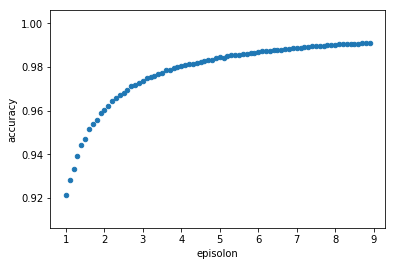

In [6]:
orig_arr = pd.DataFrame(all_pa_ed).T
accuracy_df = pd.DataFrame()
eps_range = np.arange(1,9.0,.1)
accuracy_df['episolon'] = eps_range
accuracy_df['accuracy'] = [avg_l1_laplace(x, orig_arr) for x in eps_range]
accuracy_df.plot.scatter('episolon', 'accuracy')
plt.show()

### Postprocessing

Postprocessing the output of a DP mechanism does not degrade privacy. In this case, we want to round any negative counts to zero.

In [7]:
noisy_counts = laplace_mech(orig_arr, 1)
noisy_counts

SCHL,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
0,591.023663,1.515137,6.405184,11.194331,20.70921,33.471717,37.401732,66.800437,125.708562,57.999768,...,397.415155,2082.700989,200.095112,675.973329,1613.005025,611.931078,3350.608664,1977.623019,720.666954,723.628874


In [8]:
for i in range(1, 24):
    if noisy_counts[i].item() < 0:
        noisy_counts[i] = 0

In [9]:
noisy_counts

SCHL,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
0,591.023663,1.515137,6.405184,11.194331,20.70921,33.471717,37.401732,66.800437,125.708562,57.999768,...,397.415155,2082.700989,200.095112,675.973329,1613.005025,611.931078,3350.608664,1977.623019,720.666954,723.628874
